# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (**select the columns** that are useful)
- Preprocess (**Scale**)
- **Reduce dimensionality** and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- **Preprocess** the data
- Try to **predict** "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. **Random Forest**)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



First, let's import the stuff we'll be needing

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.preprocessing import MinMaxScaler

pd.set_option('display.float_format', lambda x: '%.3f' % x) # in order to avoid scientific notation

# Unsupervised ML



- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Reading in (from csv) and inspecting data

In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

In [0]:
turnover.info()

In [0]:
turnover.head()

## Preprocessing variables:
* recoding salary

In [0]:
salary_mapper = {'low' :0, 'medium':1, 'high': 2}
turnover['salary_recoded'] = turnover.salary.map(salary_mapper)

##Selecting the relevant variables


In [0]:
# Let's select interesting variables for the analysis
vars_analysis = turnover.loc[:,["satisfaction", "evaluation", "number_of_projects", "average_montly_hours", "time_spend_company", "promotion",  "salary_recoded"]] 
department    = turnover.loc[:,"department"]
vars_descr    = turnover.loc[:,["churn", "salary"]]

In [0]:
vars_analysis.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,promotion,salary_recoded
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.021,0.595
std,0.249,0.171,1.233,49.943,1.460,0.144,0.637
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,1.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,1.000
max,1.000,1.000,7.000,310.000,10.000,1.000,2.000


## Dummy-coding of department variable

So that I can make the analysis with and without this variablew

In [0]:
# let's see it first
turnover.department.unique()

In [0]:
department = pd.get_dummies(department)

In [0]:
vars_analysis2 = pd.concat([vars_analysis, department], axis = 1)

We now have to data objects vars_analysis and var_analysis2

## Scaling

In [0]:
scaler = MinMaxScaler() # initiating a scaler
variable
#applying

vars_analysis_scaled = scaler.fit_transform(vars_analysis)
vars_analysis2_scaled = scaler.fit_transform(vars_analysis2)

In [0]:
vars_analysis_scaled = pd.DataFrame(vars_analysis_scaled, columns = vars_analysis.columns)
vars_analysis2_scaled = pd.DataFrame(vars_analysis2_scaled, columns = vars_analysis2.columns)

Look at both

In [0]:
vars_analysis_scaled.describe()

In [0]:
vars_analysis2_scaled.describe()

## Dimensionality reduction PCA

In [0]:
 row, cols = vars_analysis_scaled.shape
 row2, cols2 = vars_analysis2_scaled.shape


Based on a first run, we do not use the department variable in our model

Lets' first make a pca and all the pc's in order to investigate the eigenvalues

In [0]:
# iniating the method to keep all dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components = cols)

In [0]:
# fitting our data to the model
X_reduced = pca.fit_transform(vars_analysis_scaled)

looking at the eigenvalue plot

In [0]:
plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca.explained_variance_ratio_)}).stack()

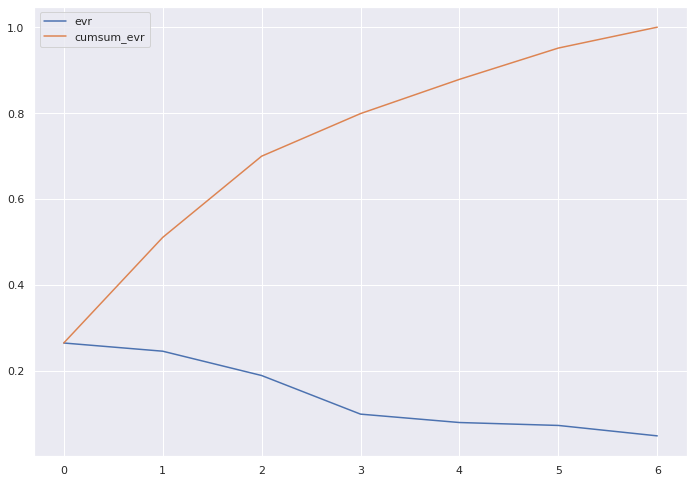

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

With three dimensions (components) we account for around 2/3's of the total inertia



In [0]:
# Iniation the model again, keeping only 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

In [0]:
X_reduced = pca.fit_transform(vars_analysis_scaled)

In [0]:
pcscores = pd.DataFrame(X_reduced)
loadings = pd.DataFrame(pca.components_, columns=vars_analysis_scaled.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

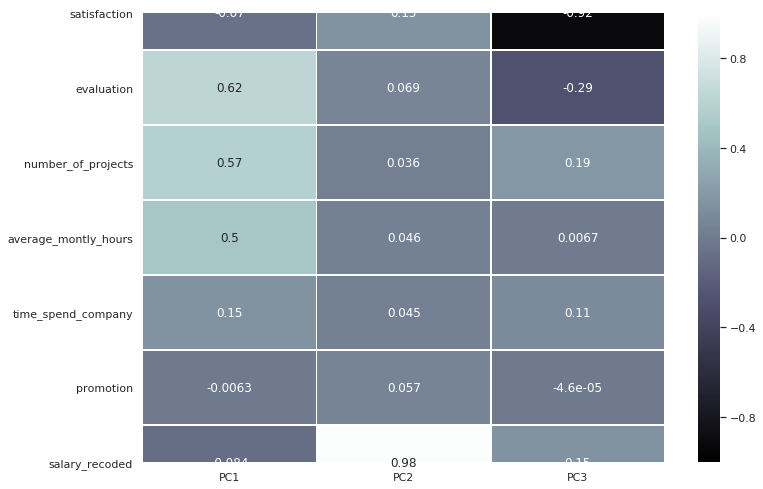

In [0]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

Something strange happens here, let's look at a matrix of correlation between our variables

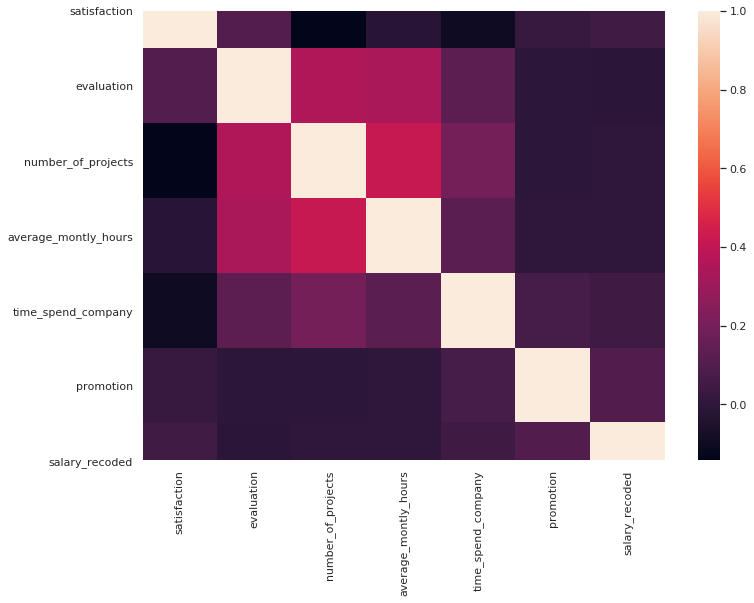

In [0]:

ax = sns.heatmap(vars_analysis_scaled.corr())

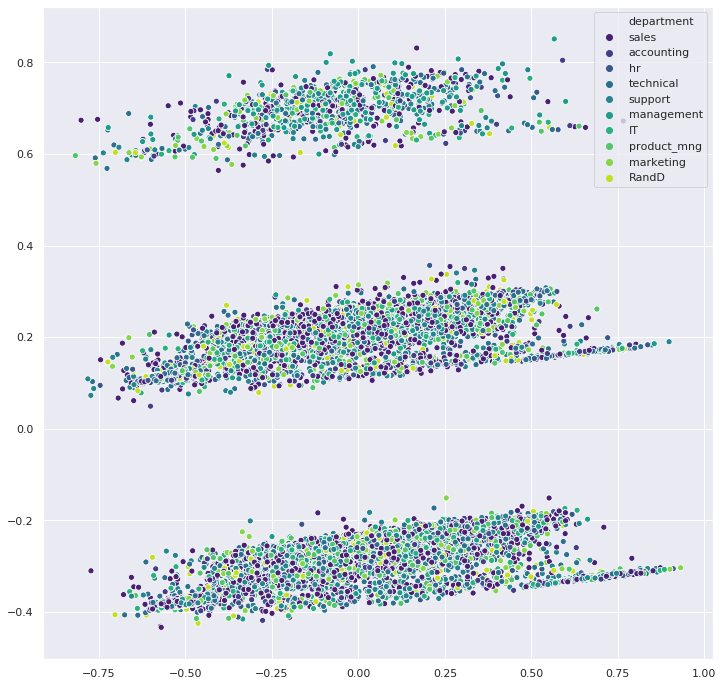

In [0]:
# Now we can plot in our points in sub_space1_2
plt.figure(figsize=(12,12))
g = sns.scatterplot(X_reduced[:,0], X_reduced[:,1],
                    legend='full', palette='viridis', hue = turnover.department)

legend = g.get_legend()

It's a strange plot since the second principle component is driven primarily (98%) by our 3-category salary variable.

# Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model

In [0]:
# defining X's and the y
# vars_analysis_scaled excludes the department variable
# vars_analysis2_scaled includes the department variable
X = vars_analysis2_scaled

y = turnover.churn

Correlation between our Xs and the y

In [0]:
crs = []
rows, cols = X.shape
for i in X.columns:
      crs.append(y.corr(X[i]))
  
pd.DataFrame(crs, index = X.columns, columns = ['Churn'])

,Churn
satisfaction,-0.388
evaluation,0.007
number_of_projects,0.024
average_montly_hours,0.071
time_spend_company,0.145
promotion,-0.062
salary_recoded,-0.158
IT,-0.011
RandD,-0.047
accounting,0.015


From an initial look at the pairwise correlation between our predictors and what we want want to predict (the churn), we can expect some kind of prediction. Theres an expected negative correlation between satisfaction and the propensity to leave the firm. Also the level of the salary is negatively correlated to churn. On the other hand, from the correlation between time spend in company and the propensity to leave, we see a small 'time to move on' effect.

In [0]:
X.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,promotion,salary_recoded,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.575,0.556,0.361,0.491,0.187,0.021,0.297,0.082,0.052,0.051,0.049,0.042,0.057,0.060,0.276,0.149,0.181
std,0.273,0.267,0.247,0.233,0.183,0.144,0.319,0.274,0.223,0.220,0.216,0.201,0.232,0.238,0.447,0.356,0.385
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.385,0.313,0.200,0.280,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.604,0.562,0.400,0.486,0.125,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.802,0.797,0.600,0.696,0.250,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [0]:
y.describe()

count   14999.000
mean        0.238
std         0.426
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: churn, dtype: float64

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Training and evaluating various models


In [0]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#Iniating the log.reg.model


In [0]:
model = LogisticRegression()

In [0]:
# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.77666667 0.7825     0.77791667 0.77708333 0.76865361]
0.762


This first model provides us with an overall accuracy of at 76% 

In [0]:
# Performance evaluation using the classification_report

#target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2294
           1       0.49      0.24      0.33       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.73      0.76      0.73      3000



However, although the overall accuracy seemed allright, we see know that the model has problems predicting the actual churns (churn = 1) 

In [0]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

In [0]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7952aa4668>)

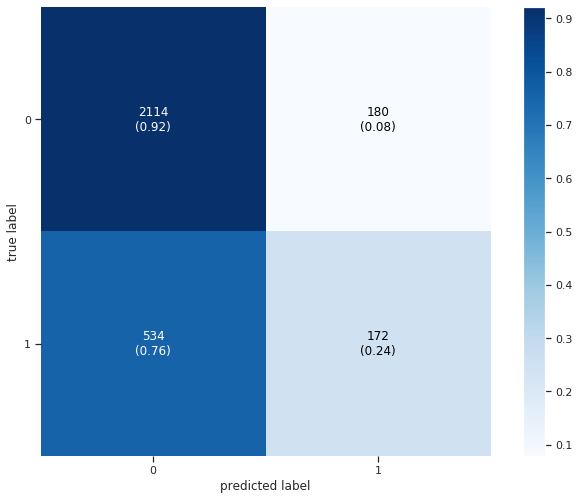

In [0]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True)

### Random Forest


In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.985      0.98625    0.98791667 0.99       0.98832847]
0.987


In [0]:
# Performance evaluation using the classification_report

#target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



The random forest classifier yeilds an almost perfect prediction of our data

(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7954b1ea58>)

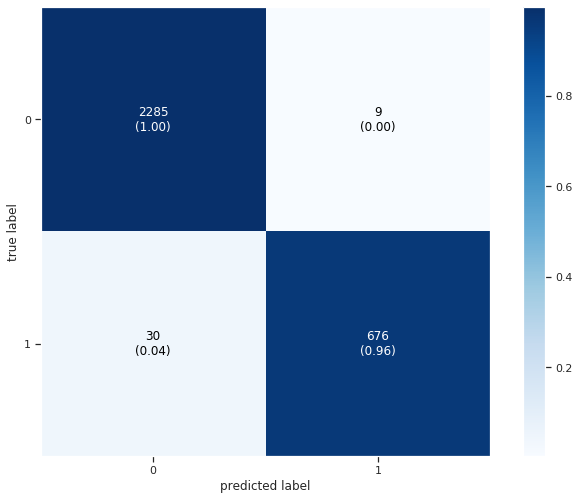

In [0]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

## Let's try to predict satisfaction


In [0]:
# defining X's and the y
# vars_analysis_scaled excludes the department variable
# vars_analysis2_scaled includes the department variable
X = vars_analysis_scaled.drop("satisfaction", axis=1)

y = vars_analysis_scaled.satisfaction

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
model = LinearRegression()
# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.05943387 0.05061    0.05497202 0.05890234 0.05785746]
0.0609731136481938


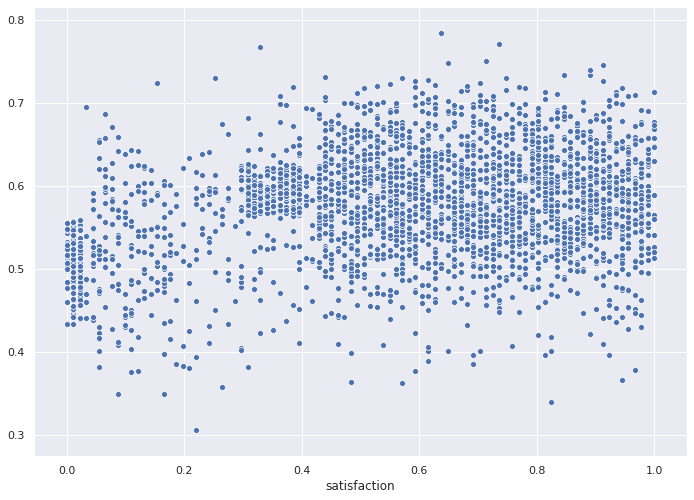

In [0]:
# Performance evaluatio

y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)